In [1]:
%load_ext autotime
import numpy as np
#include 1D Conv layer, Pooling, sampling and flatten 
from keras.layers import Input, Dense, Conv1D,MaxPooling1D,UpSampling1D ,K,AveragePooling1D,Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
a=np.genfromtxt('data_for_clustering.csv', delimiter=',')
a=a[:-1]
print(a[1])
x=a[:250*910]
x=x[20*250:]
x=x.reshape(-1,250)
me=np.mean(x,axis=1)
x=(x.T-me).T
maxi,mini=np.max(x,axis=1),np.min(x,axis=1)
x=(x.T/(maxi-mini)).T
x=x.reshape(890,250,1)
x.shape

39963.59


(890, 250, 1)

time: 2.57 s


In [13]:
#keras api method for defining a model
model=Sequential()
pool_size=10
#model.add(Dense(250, activation='linear'))
model.add(Conv1D(4,10, input_shape=x.shape[1:],activation='linear',padding='same'))
#pooling is done to extract best feature from a window, padiing is done for maintaining the shape
model.add(AveragePooling1D(pool_size=(5),padding='same'))

model.add(Conv1D(2,10,padding='same',activation='linear'))
model.add(AveragePooling1D(pool_size=(5),padding='same'))

#model.add(Conv1D(1,5,padding='same',activation='linear'))
#model.add(AveragePooling1D(pool_size=(5),padding='same'))

#model.add(Conv1D(1,5,padding='same',activation='linear'))
#model.add(UpSampling1D(5))

model.add(Conv1D(2,10,padding='same',activation='linear'))
model.add(UpSampling1D(5))

model.add(Conv1D(4,10,padding='same',activation='linear'))
model.add(UpSampling1D(5))
#model.add(Flatten())

model.add(Conv1D(1,10, padding='same',activation='linear'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

time: 185 ms


In [14]:
model.fit(x, x, batch_size=10, epochs=50)

Epoch 1/50
890/890 [==============================] - 1s 2ms/step - loss: 0.0434 - acc: 0.0000e+00
Epoch 2/50
890/890 [==============================] - 1s 916us/step - loss: 0.0398 - acc: 0.0000e+00
Epoch 3/50
890/890 [==============================] - 1s 908us/step - loss: 0.0391 - acc: 0.0000e+00
Epoch 4/50
890/890 [==============================] - 1s 933us/step - loss: 0.0388 - acc: 0.0000e+00
Epoch 5/50
890/890 [==============================] - 1s 949us/step - loss: 0.0382 - acc: 0.0000e+00
Epoch 6/50
890/890 [==============================] - 1s 929us/step - loss: 0.0356 - acc: 0.0000e+00
Epoch 7/50
890/890 [==============================] - 1s 947us/step - loss: 0.0312 - acc: 0.0000e+00
Epoch 8/50
890/890 [==============================] - 1s 919us/step - loss: 0.0256 - acc: 0.0000e+00
Epoch 9/50
890/890 [==============================] - 1s 921us/step - loss: 0.0230 - acc: 0.0000e+00
Epoch 10/50
890/890 [==============================] - 1s 949us/step - loss: 0.0208 - acc: 0.

time: 43 s


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 250, 4)            44        
_________________________________________________________________
average_pooling1d_7 (Average (None, 50, 4)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 50, 2)             82        
_________________________________________________________________
average_pooling1d_8 (Average (None, 10, 2)             0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 10, 2)             42        
_________________________________________________________________
up_sampling1d_7 (UpSampling1 (None, 50, 2)             0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 50, 4)             84        
__________

In [17]:
#getting the conpressed layer
compressed_layer =3
get_3rd_layer_output = K.function([model.layers[0].input], [model.layers[compressed_layer].output])
compressed = get_3rd_layer_output([x])[0]

time: 109 ms


In [18]:
compressed[0].shape

(10, 2)

time: 2 ms


In [19]:
decoded_output=model.predict(x)

time: 195 ms


In [20]:
decoded_output[0]

array([[ 0.06984969],
       [-0.05003847],
       [-0.1457158 ],
       [-0.29288182],
       [-0.66052103],
       [-0.6447773 ],
       [-0.6319529 ],
       [-0.5895334 ],
       [-0.57590514],
       [-0.5012279 ],
       [-0.4689567 ],
       [-0.42702207],
       [-0.3722198 ],
       [-0.31731763],
       [-0.23628214],
       [-0.21145715],
       [-0.15591456],
       [-0.10459775],
       [-0.08243242],
       [-0.03501341],
       [ 0.03217958],
       [ 0.05926361],
       [ 0.11693542],
       [ 0.17196524],
       [ 0.20865695],
       [ 0.302539  ],
       [ 0.33272085],
       [ 0.36222866],
       [ 0.34249562],
       [ 0.33513448],
       [ 0.32732683],
       [ 0.27797502],
       [ 0.26470694],
       [ 0.21365127],
       [ 0.19658715],
       [ 0.1476337 ],
       [ 0.09658307],
       [ 0.0995782 ],
       [ 0.05973627],
       [ 0.05727266],
       [ 0.08767699],
       [ 0.09126313],
       [ 0.1432001 ],
       [ 0.16272703],
       [ 0.2271585 ],
       [ 0

time: 11 ms


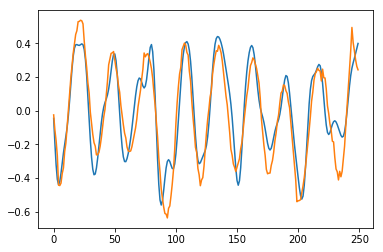

time: 134 ms


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
q=10
plt.plot(range(250),x[q],label=1)
plt.plot(range(250),decoded_output[q],label=2)

In [25]:
compressed=compressed.reshape(890,20)
#np.savetxt('compressed_data1.csv',compressed,delimiter=',')

time: 998 µs


In [19]:
print(compressed)
print(compressed.reshape(890,20))

[[[145.64311    89.69908  ]
  [ 59.87969   -75.12716  ]
  [-47.12908   -18.28421  ]
  ...
  [-16.267395  -19.610474 ]
  [-73.05257   -16.538263 ]
  [ -2.4309487 -51.38665  ]]

 [[-24.813282  -60.113045 ]
  [-30.544958   30.06396  ]
  [105.22003   -11.0095825]
  ...
  [-19.988525   89.35518  ]
  [ -2.4909637 -41.62992  ]
  [ -9.945433  -60.893238 ]]

 [[ 24.401154  -20.687405 ]
  [-23.201563   12.746546 ]
  [-73.02566   -24.93848  ]
  ...
  [ -9.8739195 -61.45342  ]
  [-35.201363  -34.90452  ]
  [ 11.596093   31.951382 ]]

 ...

 [[-23.3797    -51.320454 ]
  [ 23.547718    5.016565 ]
  [119.63274   -27.92373  ]
  ...
  [-61.158913  -39.94712  ]
  [-41.478436   82.67122  ]
  [ -1.2712152 -29.121058 ]]

 [[-19.346819   30.418798 ]
  [-20.674006  -18.746948 ]
  [107.348465   20.43299  ]
  ...
  [-35.73685    24.40514  ]
  [ 32.35891    61.52555  ]
  [-17.708881  -52.101227 ]]

 [[-11.90168    -2.028717 ]
  [ 18.493996   55.24243  ]
  [  7.5473967 -36.094616 ]
  ...
  [-63.115124    2.83878